### 0. 필요한 모듈 불러오기, 데이터 준비

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

'''< data 불러오기 >'''
mnist = keras.datasets.mnist


(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(len(x_train))
print(len(x_test))

60000
10000


In [2]:
print('y_train: ', y_train) 
print('y_train: ', y_test)

y_train:  [5 0 4 ... 5 6 8]
y_train:  [7 2 1 ... 4 5 6]


2


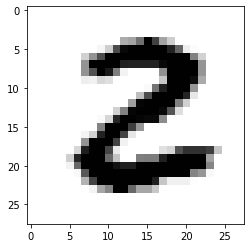

In [5]:
plt.imshow(x_train[25], cmap = plt.cm.binary) # plt.cm.binary or gray: 흑백, 없으면 컬러
print(y_train[25])

In [8]:
'''x_train의 shape확인하기'''
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape  # 60000개의 1차원 벡터

(60000,)

In [10]:

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
'''< data 표준화: 0~1사이 normalization 수행>'''

print(np.max(x_train))
print(np.min(x_train))

255
0


In [18]:
x_train_norm = x_train/np.max(x_train)
x_test_norm = x_test/np.max(x_test)

print(np.max(x_train_norm))
print(np.max(x_test_norm))
print(np.min(x_train_norm))
print(np.min(x_test_norm))

1.0
1.0
0.0
0.0


In [21]:
'''x_train의 이미지를 (5,28,28) shape로 출력(6000만개 중 5개 출력)'''
x_train[:5].shape # or x_train[3:8].shape

(5, 28, 28)

In [26]:
'''(28, 28*5) shape -> (28, 140)
np.hstack: height 방향의 배열을 풀어서 width 방향으로 연결'''

np.hstack(x_train[:5]).shape

(28, 140)

In [43]:
x_train[:5].shape

(5, 28, 28)

In [42]:
'''transpose 함수 (28, 28*5)
train_images[:5]
transpose와 reshape를 사용해서 (28, 140)shape를 만들기'''

# ((np.transpose(x_train[:5])).reshape(28,140)).shape: 2차원일 때, np.transpose 사용이므로 잘못된 방법임

'''x_train[:5] 변수를 transpose를 이용해서 (28, 5, 28)로 출력'''

x_train[:5].transpose(1,0,2).shape  # 3차원일 때, 원하는 축 변경하려면  .transpose( , , )

(28, 5, 28)

In [46]:
x_train[:5].transpose(1,0,2).reshape(28,-1).shape # "-1" 활용

# https://rfriend.tistory.com/345

(28, 140)

label:  [5 0 4 1 9]


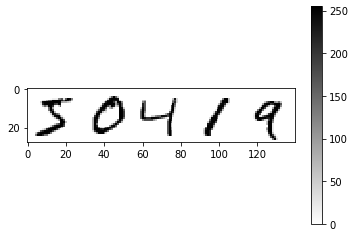

In [51]:
plt.imshow(x_train[:5].transpose(1,0,2).reshape(28,-1), cmap=plt.cm.binary)
plt.colorbar()
print('label: ',y_train[:5])

### 1. 데이터 양 늘리기 - Augmentation - noise 추가

In [53]:
'''np.random.random()을 이용해서 0-1 사의의 랜덤값을 3회 출력하는 코드를 작성'''
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.8791856703438107
0.9171135291308358
0.47041475047093584


In [58]:
'''np.random.random 함수와 shape 파라매터를 이용하여 (28, 28)의 랜덤 노이즈를 생성하는 코드를 작성'''
np.random.rand(28,28).shape

(28, 28)

In [59]:
np.random.random((28,28)).shape

(28, 28)

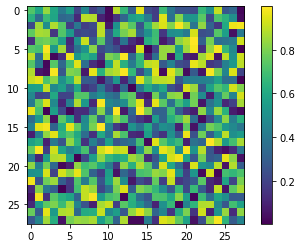

In [67]:
plt.imshow(np.random.rand(28,28))
plt.colorbar()

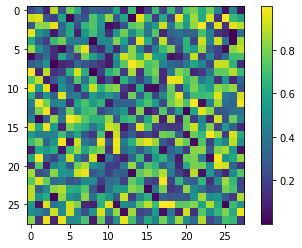

In [66]:
plt.imshow(np.random.random((28,28)))
plt.colorbar()

In [69]:
'''가우시안 노이즈 함수를 사용하여 평균 0, 표준편차 0.1, 사이즈 1로 랜덤 값을 3번 출력하세요. (np.random.normal)'''
# https://rfriend.tistory.com/284
print(np.random.normal(0,0.1,1))
print(np.random.normal(0,0.1,1))
print(np.random.normal(0,0.1,1))

[0.06216716]
[-0.00028208]
[0.12623399]


In [72]:
'''가우시안 노이즈 함수 mu = 3.0, std = 0.1, size = 1 / mu = 0.0, std = 0.01, size = 1을 출력하는 코드'''
print(np.random.normal(3.0,0.1,1))
print(np.random.normal(0.0,0.01,1))

print(np.random.normal(3.0,0.1,5))

[2.94878651]
[-0.01382792]
[2.86624217 3.09530966 2.97932159 2.90218489 3.05478999]


In [80]:
'''x_train[5]와 가우시안 노이즈 (28, 28)을 더한 뒤 noisy_image 변수에 할당하는 코드. mu = 0.5, std = 0.1'''
noisy_image = x_train_norm[5] + np.random.normal(0.5, 0.1, (28,28))
noisy_image.shape

(28, 28)

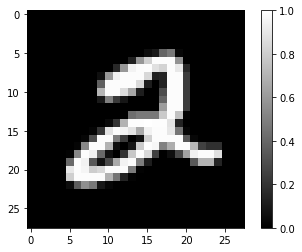

In [83]:
plt.imshow(x_train_norm[5], cmap='gray')
plt.colorbar()

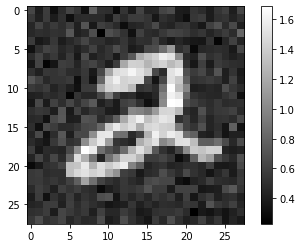

In [84]:
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()

In [86]:
print(np.min(noisy_image))
print(np.max(noisy_image))

0.22870555228949385
1.6880103266256195


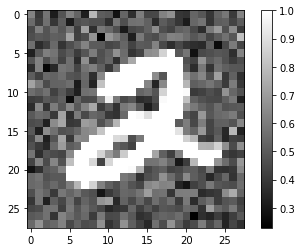

In [87]:
'''max가 1을 초과하지 않게 noisy_image를 수정한 뒤 plt로 출력'''
noisy_image[noisy_image>1.0]=1.0
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()

In [88]:
x_train_norm.shape

(60000, 28, 28)

In [91]:
'''< train_noisy_image와 test_nosiy_images를 생성하는 코드 >'''

train_noisy_image = x_train_norm + np.random.normal(0.5, 0.1, (60000, 28, 28))
print(train_noisy_image.shape)
train_noisy_image[train_noisy_image>1.0]=1.0

test_noisy_image = x_test_norm + np.random.normal(0.5, 0.1, x_test_norm.shape)
print(test_noisy_image.shape)
test_noisy_image[test_noisy_image>1.0]=1.0

(60000, 28, 28)
(10000, 28, 28)


[5 0 4 1 9 2 1 3 1 4]


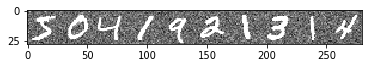

In [125]:
plt.imshow(train_noisy_image[:10].transpose((1,0,2)).reshape(28, -1), cmap='gray')
print(y_train[:10])

In [129]:
print(train_noisy_image[:10].shape)
print(train_noisy_image[:10].transpose((1,0,2)).shape)
print(train_noisy_image[:10].transpose((1,0,2)).reshape(28, -1).shape)

(10, 28, 28)
(28, 10, 28)
(28, 280)


[7 2 1 0 4 1 4 9 5 9]


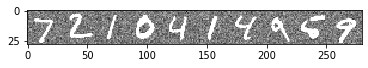

In [97]:
plt.imshow(test_noisy_image[:10].transpose((1,0,2)).reshape(28, -1), cmap='gray')
print(y_test[:10])

### 2. label encoding

* to_categorical: 자동으로 라벨을 붙여줌 (from keras.utils import to_categorical)

In [99]:
pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [105]:
'''< train/test labels에 onehot encoding을 적용하여 shape을 (배치사이즈,) 에서 (배치사이즈, 클래스 개수)로 변경하는 코드 >
'''

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

print(y_train.shape, y_test.shape)

y_train_label = to_categorical(y_train, 10)
y_test_label = to_categorical(y_test, 10)

print(y_train_label.shape, y_test_label.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


In [102]:
print(y_train[0])
print(y_train_label[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 3. model 만들기

In [131]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [113]:
from keras.layers import SimpleRNN
from keras.layers import Dense, Input
from keras.models import Model

inputs = Input(shape=(28, 28))
x1 = SimpleRNN(64, activation="tanh")(inputs)
x2 = Dense(10, activation="softmax")(x1)
model = Model(inputs, x2)

In [114]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                5952      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


### 4. 학습하기

In [115]:
'''model.compile / loss='categorical_crossentropy' / optimizer='adam'
metrics = ["accuracy"]'''

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ["accuracy"])

In [116]:
hist = model.fit(train_noisy_image, y_train_label,  epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6857 - accuracy: 0.7746
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3743 - accuracy: 0.8882
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3035 - accuracy: 0.9111
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2735 - accuracy: 0.9210
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2562 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2360 - accuracy: 0.9337
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2266 - accuracy: 0.9339
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2192 - accuracy: 0.9373
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2120 - accuracy: 0.9392
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - los

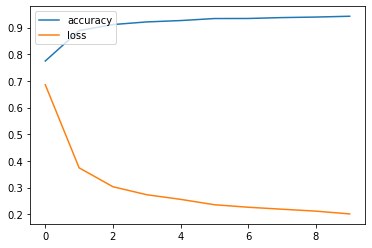

In [118]:
'''hist의 accuracy plt의 plot을 이용하여 출력하는 코드''' 
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
# plt.plot(hist.history['val_accuracy'], label='val_accuracy')
# plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

### 5. 예측하기

In [123]:
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)   # np.argmax: 가장 높은 값 반환

idx=0 # 1번째 x_test_norm을 살펴보자
print("* model.predict() 결과: ", predicted_result[idx], "\n")
print("* model이 추론한 가장 가능성이 높은 결과: ", predicted_labels[idx], "\n")
print('* 실제 데이터의 라벨: ', y_test[idx])

* model.predict() 결과:  [1.2316475e-01 2.7265161e-05 8.5259104e-05 1.8776315e-03 2.2067493e-02
 7.4933446e-04 3.0192666e-04 5.6776404e-01 1.4833654e-02 2.6912856e-01] 

* model이 추론한 가장 가능성이 높은 결과:  7 

* 실제 데이터의 라벨:  7


In [ ]:
# 1. 데이터
import numpy as np
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([1,2,3,4,5,6,7,8,9,10])
x_test = np.array([11,12,13,14,15,16,17,18,19,20])
y_test = np.array([11,12,13,14,15,16,17,18,19,20])
x_val = np.array([101,102,103,104,105])
y_val = np.array([101,102,103,104,105])
 
# 2. 모델 구성
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10, input_shape=(1, ), activation='relu'))
model.add(Dense(10))
model.add(Dense(8))
model.add(Dense(1))
 
# 3. 훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=100, batch_size=1, validation_data=(x_val, y_val))
 
# 4. 평가 예측
loss, mse = model.evaluate(x_test, y_test, batch_size=1)
print('acc : ', mse)
 
y_predict = model.predict(x_test)
print(y_predict)
 
# RMSE 구하기
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE : ', RMSE(y_test, y_predict)) 
 
# R2 구하기
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print('R2 : ', r2_y_predict)


출처: https://ebbnflow.tistory.com/125 [Dev Log : 삶은 확률의 구름]